In [5]:
#Data collection
#load python packages
import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [6]:
os.getcwd()

'C:\\Users\\chris\\Springboard_rep\\Capstone-Project-2'

In [7]:
#loading the dataset of interest
df = pd.read_csv('appstore_games.csv')
#Drop columns URL, Name, Subtitle, Icon URL, Description, Delevoper and Primary Genre
df.drop(['URL', 'Name', 'Subtitle', 'Icon URL', 'Description', 'Developer', 'Primary Genre'], axis=1, inplace=True)
df.rename(columns = {'Average User Rating':'Rating', 'User Rating Count': 'Rating Count', 'In-app Purchases': 'InAppPurc',
                     'Original Release Date': 'Org Rel Date', 'Current Version Release Date':'Cur Rel Date',
                     'Languages':'Lang'}, inplace=True)

In [8]:
print(df.shape)
print(df.head())

(17007, 11)
          ID  Rating  Rating Count  Price InAppPurc Age Rating  \
0  284921427     4.0        3553.0   2.99       NaN         4+   
1  284926400     3.5         284.0   1.99       NaN         4+   
2  284946595     3.0        8376.0   0.00       NaN         4+   
3  285755462     3.5      190394.0   0.00       NaN         4+   
4  285831220     3.5          28.0   2.99       NaN         4+   

                                                Lang        Size  \
0  DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...  15853568.0   
1                                                 EN  12328960.0   
2                                                 EN    674816.0   
3  DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...  21552128.0   
4  DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...  34689024.0   

                              Genres Org Rel Date Cur Rel Date  
0            Games, Strategy, Puzzle   11/07/2008   30/05/2017  
1             Games, Strategy, Board   11/07/2008   

In [9]:
#check for duplicates on ID and drop them
df_sort = df.sort_values(by='ID')
duplicateRowsDF = df_sort[df_sort['ID'].duplicated()]
#Print out how many duplicates were spotted in the dataset
print('**Duplicated rows in the dataset**')
print(df_sort['ID'].duplicated().value_counts())
#Drop duplicates 
df = df_sort.drop_duplicates()
print(df.shape)

**Duplicated rows in the dataset**
False    16847
True       160
Name: ID, dtype: int64
(16847, 11)


In [10]:
#testing to make sure duplicates were spotted
test_ID = df_sort[df_sort['ID'] == 289217958]
print(test_ID)

           ID  Rating  Rating Count  Price InAppPurc Age Rating  \
16  289217958     3.0         112.0    0.0      0.99         4+   
15  289217958     3.0         112.0    0.0      0.99         4+   

                  Lang         Size                  Genres Org Rel Date  \
16  EN, FR, DE, IT, ES  122826752.0  Games, Strategy, Board   31/08/2008   
15  EN, FR, DE, IT, ES  122826752.0  Games, Strategy, Board   31/08/2008   

   Cur Rel Date  
16    6/04/2015  
15    6/04/2015  


In [11]:
#Filled missing lang fields with "EN" and counted number of languages for each app
df['Lang'].fillna('EN', inplace=True)
df['Lang_count'] = df.Lang.str.count(",") + 1
df.drop(['Lang'],axis=1, inplace=True)

C:\Users\chris\anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
C:\Users\chris\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\chris\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/

In [12]:
#Turn 'InAppPurc' column into a bool condition
#True if In app purchse is available in the app
df['InAppPurc'] = df['InAppPurc'].notnull()

C:\Users\chris\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [13]:
#Obtain a unique list of genre categories
genre_list = df['Genres'].tolist()

def convert(g_list, seperator=','):
    return seperator.join(g_list)
genre_list_convert = convert(genre_list)
genre_list_clean = genre_list_convert.split(',')

#Count the number of genres for each app
df['gen_count'] = df.Genres.str.count(",") +1
genre_list = df['Genres'].tolist()

genre_cleaner = sorted(set([g.strip() for g in genre_list_clean]))

print(genre_cleaner, type(genre_cleaner))


['Action', 'Adventure', 'Animals & Nature', 'Art', 'Board', 'Books', 'Business', 'Card', 'Casino', 'Casual', 'Comics & Cartoons', 'Education', 'Emoji & Expressions', 'Entertainment', 'Family', 'Finance', 'Food & Drink', 'Games', 'Gaming', 'Health & Fitness', 'Kids & Family', 'Lifestyle', 'Magazines & Newspapers', 'Medical', 'Music', 'Navigation', 'News', 'People', 'Photo & Video', 'Places & Objects', 'Productivity', 'Puzzle', 'Racing', 'Reference', 'Role Playing', 'Shopping', 'Simulation', 'Social Networking', 'Sports', 'Sports & Activities', 'Stickers', 'Strategy', 'Travel', 'Trivia', 'Utilities', 'Weather', 'Word'] <class 'list'>


C:\Users\chris\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [14]:
#Inspect df
print(df)
print(df.info())
print(df.describe().T)

               ID  Rating  Rating Count  Price  InAppPurc Age Rating  \
0       284921427     4.0        3553.0   2.99      False         4+   
1       284926400     3.5         284.0   1.99      False         4+   
2       284946595     3.0        8376.0   0.00      False         4+   
3       285755462     3.5      190394.0   0.00      False         4+   
4       285831220     3.5          28.0   2.99      False         4+   
...           ...     ...           ...    ...        ...        ...   
17002  1474626442     NaN           NaN   0.00      False         4+   
17003  1474919257     NaN           NaN   0.00      False         4+   
17004  1474962324     NaN           NaN   0.00      False         4+   
17005  1474963671     NaN           NaN   0.00       True         4+   
17006  1475076711     NaN           NaN   0.00      False         4+   

              Size                                  Genres Org Rel Date  \
0       15853568.0                 Games, Strategy, Puzzle  

In [15]:
#what should I do with the apps with no rating and price? 
#For now I will leave it in as NaN for both Rating and Rating Count

In [16]:
#Filled one missing size fields with mean
df['Size'].fillna((df['Size'].mean()), inplace=True)

C:\Users\chris\anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [17]:
#Fill 24 missing Price fields with mean
df['Price'].fillna((df['Price'].mean()), inplace=True)

In [18]:
#Strip off '+' from Age Rating and convert to int
df['Age Rating'] = df['Age Rating'].map(lambda x: x.rstrip('+'))
df['Age Rating'] = df['Age Rating'].astype(str).astype(int)

C:\Users\chris\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\chris\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [19]:
#Convert Org Rel Date and Cur Rel Date to datetime format

df[['Org Rel Date', 'Cur Rel Date']] = df[['Org Rel Date', 'Cur Rel Date']].apply(pd.to_datetime)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16847 entries, 0 to 17006
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   ID            16847 non-null  int64         
 1   Rating        7488 non-null   float64       
 2   Rating Count  7488 non-null   float64       
 3   Price         16847 non-null  float64       
 4   InAppPurc     16847 non-null  bool          
 5   Age Rating    16847 non-null  int32         
 6   Size          16847 non-null  float64       
 7   Genres        16847 non-null  object        
 8   Org Rel Date  16847 non-null  datetime64[ns]
 9   Cur Rel Date  16847 non-null  datetime64[ns]
 10  Lang_count    16847 non-null  int64         
 11  gen_count     16847 non-null  int64         
dtypes: bool(1), datetime64[ns](2), float64(4), int32(1), int64(3), object(1)
memory usage: 1.5+ MB


C:\Users\chris\anaconda3\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [20]:
# #Identify the genres of each app and place in df_cat 
#This can be done with a for loop to construct these columns
df_cat = pd.DataFrame()
df_cat['Action'] = df['Genres'].str.contains('Action')
df_cat['Adventure'] = df['Genres']. str.contains('Adventure')
df_cat['Animals'] = df['Genres'].str.contains('Animals')
df_cat['Art'] = df['Genres'].str.contains('Art')
df_cat['Board'] = df['Genres'].str.contains('Board')
df_cat['Books'] = df['Genres'].str.contains('Books')
df_cat['Business'] = df['Genres'].str.contains('Business')
df_cat['Card'] = df['Genres'].str.contains('Card')
df_cat['Casino'] = df['Genres'].str.contains('Casino')
df_cat['Casual'] = df['Genres'].str.contains('Casual')
df_cat['Comics & Cartons'] = df['Genres'].str.contains('Comics & Cartons')
df_cat['Education'] = df['Genres']. str.contains('Education')
df_cat['Emoji & Expressions'] = df['Genres'].str.contains('Emoji & Expressions')
df_cat['Entertainment'] = df['Genres'].str.contains('Entertainment')
df_cat['Family'] = df['Genres'].str.contains('Family')
df_cat['Finance'] = df['Genres'].str.contains('Finance')
df_cat['Food & Drink'] = df['Genres'].str.contains('Food & Drink')
df_cat['Games'] = df['Genres'].str.contains('Games')
df_cat['Gaming'] = df['Genres'].str.contains('Gaming')
df_cat['Health & Fitness'] = df['Genres'].str.contains('Health & Fitness')
df_cat['Kids & Family'] = df['Genres'].str.contains('Kids & Family')
df_cat['Lifestyle'] = df['Genres']. str.contains('Lifestyle')
df_cat['Magazines & Newspapers'] = df['Genres'].str.contains('Magazines & Newspapers')
df_cat['Medical'] = df['Genres'].str.contains('Medical')
df_cat['Music'] = df['Genres'].str.contains('Music')
df_cat['Navigation'] = df['Genres'].str.contains('Navigation')
df_cat['News'] = df['Genres'].str.contains('News')
df_cat['People'] = df['Genres'].str.contains('People')
df_cat['Photo & Video'] = df['Genres'].str.contains('Photo & Video')
df_cat['Places & Objects'] = df['Genres'].str.contains('Places & Objects')
df_cat['Productivity'] = df['Genres'].str.contains('Productivity')
df_cat['Puzzle'] = df['Genres']. str.contains('Puzzle')
df_cat['Racing'] = df['Genres'].str.contains('Racing')
df_cat['Reference'] = df['Genres'].str.contains('Reference')
df_cat['Role Playing'] = df['Genres'].str.contains('Role Playing')
df_cat['Shopping'] = df['Genres'].str.contains('Shopping')
df_cat['Simulation'] = df['Genres'].str.contains('Simulation')
df_cat['Social Networking'] = df['Genres'].str.contains('Social Networking')
df_cat['Sports'] = df['Genres'].str.contains('Sports')
df_cat['Sports & Activities'] = df['Genres'].str.contains('Sports & Activities')
df_cat['Stickers'] = df['Genres'].str.contains('Stickers')
df_cat['Strategy'] = df['Genres'].str.contains('Strategy')
df_cat['Travel'] = df['Genres'].str.contains('Travel')
df_cat['Trivia'] = df['Genres']. str.contains('Trivia')
df_cat['Utilities'] = df['Genres'].str.contains('Utilities')
df_cat['Weather'] = df['Genres'].str.contains('Weather')
df_cat['Word'] = df['Genres'].str.contains('Word')

In [21]:
#add in ID column to the df_cat 
df_cat = df_cat.join(df['ID'])
first_col = df_cat.pop('ID')
df_cat.insert(0, 'ID', first_col)
#create a genre count for each ID
df_cat['Genre_count'] = df_cat[df_cat ==True].count(axis=1)
#Drop Genre column from df
df.drop(['Genres'],axis=1, inplace=True)
print(df_cat)
print(df_cat.info())

               ID  Action  Adventure  Animals    Art  Board  Books  Business  \
0       284921427   False      False    False  False  False  False     False   
1       284926400   False      False    False  False   True  False     False   
2       284946595   False      False    False  False   True  False     False   
3       285755462   False      False    False  False  False  False     False   
4       285831220   False      False    False  False   True  False     False   
...           ...     ...        ...      ...    ...    ...    ...       ...   
17002  1474626442   False      False    False  False  False  False     False   
17003  1474919257   False      False    False  False  False  False     False   
17004  1474962324   False      False    False  False  False  False     False   
17005  1474963671    True      False    False  False  False  False     False   
17006  1475076711   False      False    False  False  False  False     False   

        Card  Casino  ...  Sports  Spor

C:\Users\chris\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [22]:
#what can I do with this information with genres

In [72]:
#output 3 csv files from the dataframes
#df -> output.csv is the dataframe which excludes the genre categroies
#df_cat -> genres.csv is the dataframe which lists out all the genres as a boolean statement
#df_comb -> combined_df csv file is the final dataset to be used for EDA
df.to_csv('output.csv')
df_cat.to_csv('genres.csv')
df_comb = pd.concat([df, df_cat], axis=1,)
df_comb = df_comb.loc[:,~df_comb.T.duplicated(keep='first')]
df_comb.to_csv('combined_df.csv')
df_comb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16847 entries, 0 to 17006
Data columns (total 59 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   ID                      16847 non-null  int64         
 1   Rating                  7488 non-null   float64       
 2   Rating Count            7488 non-null   float64       
 3   Price                   16847 non-null  float64       
 4   InAppPurc               16847 non-null  bool          
 5   Age Rating              16847 non-null  int32         
 6   Size                    16847 non-null  float64       
 7   Org Rel Date            16847 non-null  datetime64[ns]
 8   Cur Rel Date            16847 non-null  datetime64[ns]
 9   Lang_count              16847 non-null  int64         
 10  gen_count               16847 non-null  int64         
 11  Action                  16847 non-null  bool          
 12  Adventure               16847 non-null  bool  

In [61]:
df_comb.head()

,ID,Rating,Rating Count,Price,InAppPurc,Age Rating,Size,Org Rel Date,Cur Rel Date,Lang_count,...,Sports,Sports & Activities,Stickers,Strategy,Travel,Trivia,Utilities,Weather,Word,Genre_count
0,284921427,4.0,3553.0,2.99,False,4,15853568.0,2008-11-07,2017-05-30,17,...,False,False,False,True,False,False,False,False,False,3
1,284926400,3.5,284.0,1.99,False,4,12328960.0,2008-11-07,2018-05-17,1,...,False,False,False,True,False,False,False,False,False,3
2,284946595,3.0,8376.0,0.00,False,4,674816.0,2008-11-07,2017-05-09,1,...,False,False,False,True,False,False,False,False,False,3
3,285755462,3.5,190394.0,0.00,False,4,21552128.0,2008-07-23,2017-05-30,17,...,False,False,False,True,False,False,False,False,False,3
4,285831220,3.5,28.0,2.99,False,4,34689024.0,2008-07-18,2018-07-22,15,...,False,False,False,True,False,False,False,False,False,4


In [71]:
df_cat.head()

,Action,Adventure,Animals,Art,Board,Books,Business,Card,Casino,Casual,...,Sports,Sports & Activities,Stickers,Strategy,Travel,Trivia,Utilities,Weather,Word,Genre_count
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,3
1,False,False,False,False,True,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,3
2,False,False,False,False,True,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,3
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,3
4,False,False,False,False,True,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,4


In [62]:
#EDA 
#Look at the distribution of the data
df_comb.describe()


,ID,Rating,Rating Count,Price,Age Rating,Size,Lang_count,gen_count,Genre_count
count,1.684700e+04,7488.000000,7.488000e+03,16847.000000,16847.000000,1.684700e+04,16847.000000,16847.000000,16847.000000
mean,1.059651e+09,4.062099,3.306245e+03,0.815349,6.205734,1.158181e+08,3.254229,3.558616,3.548050
std,2.999351e+08,0.750506,4.251578e+04,7.865649,3.625229,2.043153e+08,6.165888,0.571487,0.573405
min,2.849214e+08,1.000000,5.000000e+00,0.000000,4.000000,5.132800e+04,1.000000,2.000000,2.000000
25%,8.996543e+08,3.500000,1.200000e+01,0.000000,4.000000,2.295040e+07,1.000000,3.000000,3.000000
50%,1.112429e+09,4.500000,4.600000e+01,0.000000,4.000000,5.674701e+07,1.000000,4.000000,4.000000
75%,1.286958e+09,4.500000,3.072500e+02,0.000000,9.000000,1.329592e+08,2.000000,4.000000,4.000000
max,1.475077e+09,5.000000,3.032734e+06,179.990000,17.000000,4.005591e+09,111.000000,6.000000,7.000000


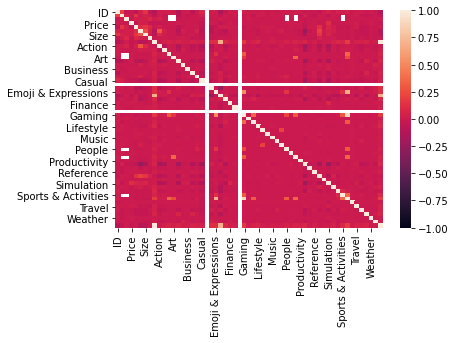

In [63]:
#create a heatmap to see how variable correlate
heatmap = sns.heatmap(df_comb.corr(), vmin=-1, vmax=1)

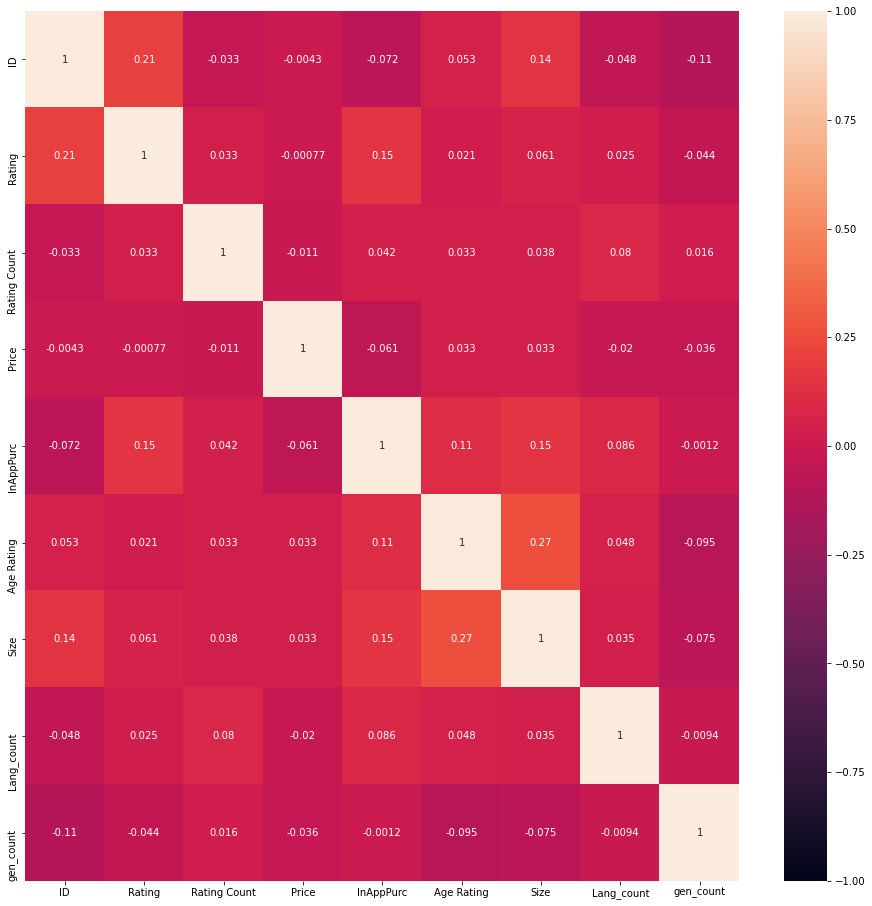

In [65]:
#create a heatmap of df only  
plt.figure(figsize=(16,16))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)

In [66]:
df.corr()[['Rating']].sort_values(by="Rating", ascending=False)

,Rating
Rating,1.000000
ID,0.210859
InAppPurc,0.149797
Size,0.061284
Rating Count,0.032655
Lang_count,0.025127
Age Rating,0.021015
Price,-0.000772
gen_count,-0.044362


Text(0.5, 1.0, 'Variables v Rating')

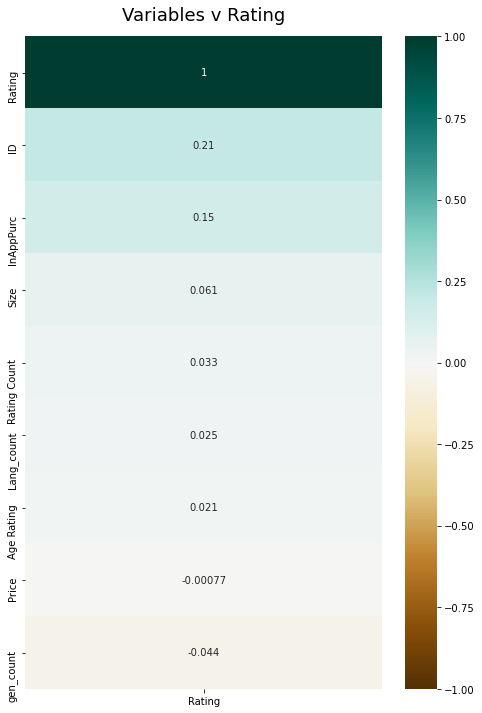

In [67]:
plt.figure(figsize=(8,12))
heatmap1 = sns.heatmap(df.corr()[['Rating']].sort_values(by="Rating", ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap1.set_title('Variables v Rating', fontdict={'fontsize':18}, pad=16)

In [58]:
#pairplot for all the numerical variables

#pair = sns.pairplot(df, vars=['gen_count', 'Price', 'Age Rating', 'Lang_count', 'Rating Count', 'Size', 'InAppPurc'])
#plt.show()


In [70]:
#EDA plots of interest
#correlation heat map
#Plot the genre types (boolean setup for now) vs ratings
#Plot the genre types vs Rating Count
#Plot the grenre types vs frequency
#Plot the InAppPurc vs ratings
